<a href="https://colab.research.google.com/github/aneeshoberoi/cbs_ba2/blob/master/NYC_Public_School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statements
1. Impact of English language learners
2. Impact of Economic Need
3. Impact of absenteesim
4. Predicting performance for a grant

In [55]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
raw=pd.read_csv('https://raw.githubusercontent.com/aneeshoberoi/cbs_ba2/master/nycpubschool/NYC%20public%20schools%20data.csv', sep=',', error_bad_lines=False, header=0)

In [25]:
train_df = pd.DataFrame(raw) 

In [26]:
train_df.set_index('school_name')

,grade,average_math_level,average_ela_level,district,lat,long,city,zip,grade_low,grade_high,econ_need_index,perc_ell,perc_asian,perc_black,perc_hispanic,perc_white,perc_attendance,perc_chron_absent,perc_rigorous_instruction,perc_collaborative_teachers,perc_supportive_environment,perc_effective_leadership,perc_community_ties,perc_trust,grades,n_grades,in_manhattan
school_name,,,,,,,,,,,,,,,,,,,,,,,,,,,
P.S. 015 Roberto Clemente,3,1.571429,1.700000,1,40.722075,-73.978747,MANHATTAN,10009,PK,05,0.919,9,5,32,60,1,94,18,89,94,86,91,85,94,"PK,0K,01,02,03,04,05",7,Yes
P.S. 015 Roberto Clemente,4,2.266667,1.866667,1,40.722075,-73.978747,MANHATTAN,10009,PK,05,0.919,9,5,32,60,1,94,18,89,94,86,91,85,94,"PK,0K,01,02,03,04,05",7,Yes
P.S. 015 Roberto Clemente,5,1.687500,1.687500,1,40.722075,-73.978747,MANHATTAN,10009,PK,05,0.919,9,5,32,60,1,94,18,89,94,86,91,85,94,"PK,0K,01,02,03,04,05",7,Yes
P.S. 019 Asher Levy,3,2.606061,2.515152,1,40.730009,-73.984496,MANHATTAN,10003,PK,05,0.641,5,10,20,63,6,92,30,96,96,97,90,86,94,"PK,0K,01,02,03,04,05",7,Yes
P.S. 019 Asher Levy,4,2.714286,2.482759,1,40.730009,-73.984496,MANHATTAN,10003,PK,05,0.641,5,10,20,63,6,92,30,96,96,97,90,86,94,"PK,0K,01,02,03,04,05",7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bronx Charter School for Better Learning,4,2.261538,2.800000,11,40.884371,-73.839288,BRONX,10466,0K,05,0.544,2,2,86,9,1,95,12,93,91,96,89,91,95,"0K,01,02,03,04,05",6,No
Bronx Charter School for Better Learning,5,2.106061,2.909091,11,40.884371,-73.839288,BRONX,10466,0K,05,0.544,2,2,86,9,1,95,12,93,91,96,89,91,95,"0K,01,02,03,04,05",6,No
Bronx Charter School for the Arts,3,2.680000,3.180000,8,40.821815,-73.886477,BRONX,10474,0K,06,0.840,15,1,28,67,2,93,22,87,84,84,77,85,84,"0K,01,02,03,04,05,06",7,No


In [56]:
train_df.dtypes

school_name                     object
grade                            int64
average_math_level             float64
average_ela_level              float64
district                         int64
lat                            float64
long                           float64
city                            object
zip                              int64
grade_low                       object
grade_high                      object
econ_need_index                float64
perc_ell                         int64
perc_asian                       int64
perc_black                       int64
perc_hispanic                    int64
perc_white                       int64
perc_attendance                  int64
perc_chron_absent                int64
perc_rigorous_instruction        int64
perc_collaborative_teachers      int64
perc_supportive_environment      int64
perc_effective_leadership        int64
perc_community_ties              int64
perc_trust                       int64
grades                   

In [59]:
# Converting to categorical
train_df['city']=train_df['city'].astype('category')
train_df['school_name']=train_df['school_name'].astype('category')
train_df['grade_low']=train_df['grade_low'].astype('category')
train_df['grade_high']=train_df['grade_high'].astype('category')
train_df['grades']=train_df['grades'].astype('category')
train_df['district']=train_df['district'].astype('category')
train_df['zip']=train_df['zip'].astype('category')
train_df['n_grades']=train_df['n_grades'].astype('category')
train_df['in_manhattan']=train_df['in_manhattan'].astype('category')

In [60]:
train_df.dtypes

school_name                    category
grade                             int64
average_math_level              float64
average_ela_level               float64
district                       category
lat                             float64
long                            float64
city                           category
zip                            category
grade_low                      category
grade_high                     category
econ_need_index                 float64
perc_ell                          int64
perc_asian                        int64
perc_black                        int64
perc_hispanic                     int64
perc_white                        int64
perc_attendance                   int64
perc_chron_absent                 int64
perc_rigorous_instruction         int64
perc_collaborative_teachers       int64
perc_supportive_environment       int64
perc_effective_leadership         int64
perc_community_ties               int64
perc_trust                        int64


In [62]:
train_df.head(5)

,school_name,grade,average_math_level,average_ela_level,district,lat,long,city,zip,grade_low,grade_high,econ_need_index,perc_ell,perc_asian,perc_black,perc_hispanic,perc_white,perc_attendance,perc_chron_absent,perc_rigorous_instruction,perc_collaborative_teachers,perc_supportive_environment,perc_effective_leadership,perc_community_ties,perc_trust,grades,n_grades,in_manhattan
0,P.S. 015 Roberto Clemente,3,1.571429,1.700000,1,40.722075,-73.978747,MANHATTAN,10009,PK,05,0.919,9,5,32,60,1,94,18,89,94,86,91,85,94,"PK,0K,01,02,03,04,05",7,Yes
1,P.S. 015 Roberto Clemente,4,2.266667,1.866667,1,40.722075,-73.978747,MANHATTAN,10009,PK,05,0.919,9,5,32,60,1,94,18,89,94,86,91,85,94,"PK,0K,01,02,03,04,05",7,Yes
2,P.S. 015 Roberto Clemente,5,1.687500,1.687500,1,40.722075,-73.978747,MANHATTAN,10009,PK,05,0.919,9,5,32,60,1,94,18,89,94,86,91,85,94,"PK,0K,01,02,03,04,05",7,Yes
3,P.S. 019 Asher Levy,3,2.606061,2.515152,1,40.730009,-73.984496,MANHATTAN,10003,PK,05,0.641,5,10,20,63,6,92,30,96,96,97,90,86,94,"PK,0K,01,02,03,04,05",7,Yes
4,P.S. 019 Asher Levy,4,2.714286,2.482759,1,40.730009,-73.984496,MANHATTAN,10003,PK,05,0.641,5,10,20,63,6,92,30,96,96,97,90,86,94,"PK,0K,01,02,03,04,05",7,Yes


In [119]:
dummies_grade=pd.get_dummies(train_df['grade'],prefix='grade_')
dummies_district=pd.get_dummies(train_df['district'],prefix='district_')

In [122]:
train_df=pd.concat([train_df,dummies_grade,dummies_district], axis=1)

In [123]:
train_df.head(5)

,school_name,grade,average_math_level,average_ela_level,district,lat,long,city,zip,grade_low,grade_high,econ_need_index,perc_ell,perc_asian,perc_black,perc_hispanic,perc_white,perc_attendance,perc_chron_absent,perc_rigorous_instruction,perc_collaborative_teachers,perc_supportive_environment,perc_effective_leadership,perc_community_ties,perc_trust,grades,n_grades,in_manhattan,grade__3,grade__4,grade__5,grade__6,grade__7,grade__8,district__1,district__2,district__3,district__4,district__5,district__6,district__7,district__8,district__9,district__10,district__11,district__12,district__13,district__14,district__15,district__16,district__17,district__18,district__19,district__20,district__21,district__22,district__23,district__24,district__25,district__26,district__27,district__28,district__29,district__30,district__31,district__32
0,P.S. 015 Roberto Clemente,3,1.571429,1.700000,1,40.722075,-73.978747,MANHATTAN,10009,PK,05,0.919,9,5,32,60,1,94,18,89,94,86,91,85,94,"PK,0K,01,02,03,04,05",7,Yes,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,P.S. 015 Roberto Clemente,4,2.266667,1.866667,1,40.722075,-73.978747,MANHATTAN,10009,PK,05,0.919,9,5,32,60,1,94,18,89,94,86,91,85,94,"PK,0K,01,02,03,04,05",7,Yes,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,P.S. 015 Roberto Clemente,5,1.687500,1.687500,1,40.722075,-73.978747,MANHATTAN,10009,PK,05,0.919,9,5,32,60,1,94,18,89,94,86,91,85,94,"PK,0K,01,02,03,04,05",7,Yes,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,P.S. 019 Asher Levy,3,2.606061,2.515152,1,40.730009,-73.984496,MANHATTAN,10003,PK,05,0.641,5,10,20,63,6,92,30,96,96,97,90,86,94,"PK,0K,01,02,03,04,05",7,Yes,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,P.S. 019 Asher Levy,4,2.714286,2.482759,1,40.730009,-73.984496,MANHATTAN,10003,PK,05,0.641,5,10,20,63,6,92,30,96,96,97,90,86,94,"PK,0K,01,02,03,04,05",7,Yes,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
cont_train_df=train_df[['average_math_level','econ_need_index','average_ela_level','perc_ell', 'perc_asian', 'perc_black','perc_hispanic', 'perc_white', 'perc_attendance', 
                     'perc_chron_absent', 'perc_rigorous_instruction', 'perc_collaborative_teachers', 'perc_supportive_environment', 'perc_effective_leadership', 
                     'perc_community_ties', 'perc_trust']]corrMatrix=train_df.corr()


In [91]:
corrMatrix=pd.DataFrame(round(cont_train_df.corr(),2))

In [97]:
with pd.option_context('display.max_columns', None):
  print(corrMatrix)

                             average_math_level  econ_need_index  \
average_math_level                         1.00            -0.64   
econ_need_index                           -0.64             1.00   
average_ela_level                          0.83            -0.65   
perc_ell                                  -0.20             0.42   
perc_asian                                 0.46            -0.33   
perc_black                                -0.35             0.27   
perc_hispanic                             -0.35             0.55   
perc_white                                 0.52            -0.78   
perc_attendance                            0.02            -0.17   
perc_chron_absent                         -0.44             0.55   
perc_rigorous_instruction                  0.30            -0.19   
perc_collaborative_teachers                0.28            -0.19   
perc_supportive_environment                0.37            -0.24   
perc_effective_leadership                  0.26 

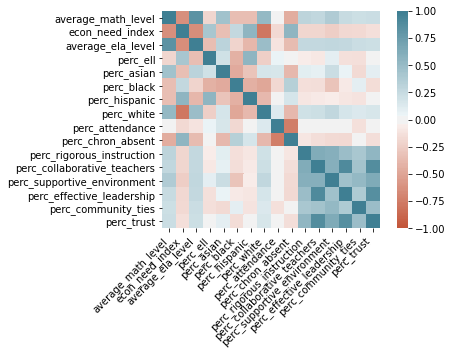

In [84]:
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

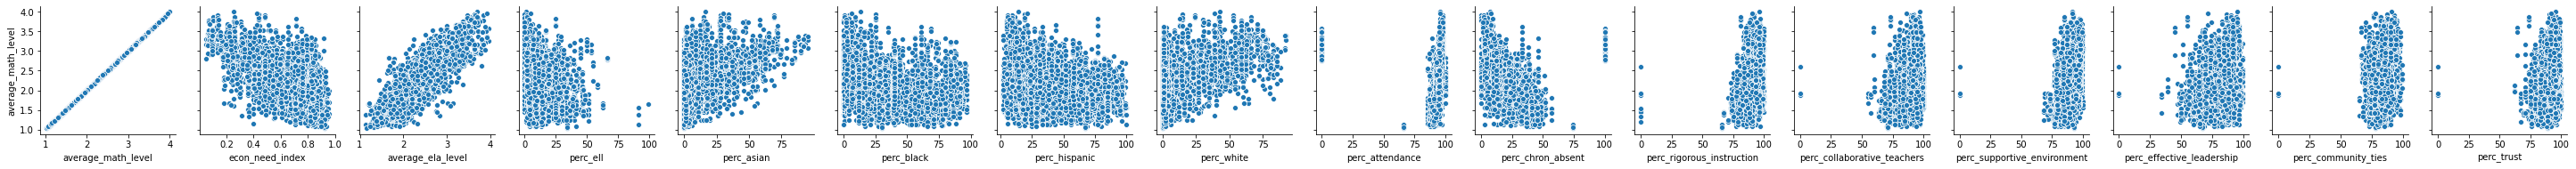

In [71]:
sns.pairplot(data=train_df,
             y_vars=['average_math_level',
                     #'econ_need_index','average_ela_level'
                     ],             
             x_vars=['average_math_level','econ_need_index','average_ela_level','perc_ell', 'perc_asian', 'perc_black','perc_hispanic', 'perc_white', 'perc_attendance', 
                     'perc_chron_absent', 'perc_rigorous_instruction', 'perc_collaborative_teachers', 'perc_supportive_environment', 'perc_effective_leadership', 
                     'perc_community_ties', 'perc_trust']
         )


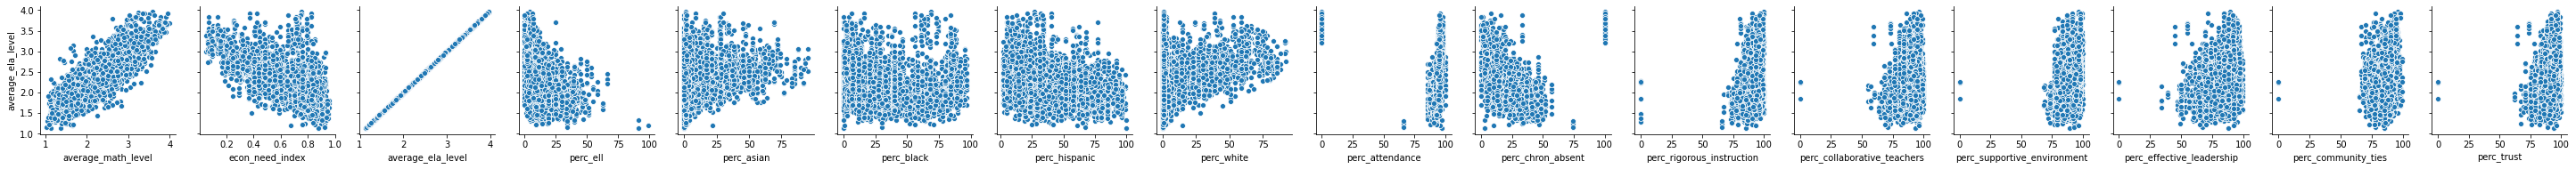

In [72]:
sns.pairplot(data=train_df,
             y_vars=['average_ela_level',
                     #'econ_need_index','average_math_level'average_ela_level
                     ],             
             x_vars=['average_math_level','econ_need_index','average_ela_level','perc_ell', 'perc_asian', 'perc_black','perc_hispanic', 'perc_white', 'perc_attendance', 
                     'perc_chron_absent', 'perc_rigorous_instruction', 'perc_collaborative_teachers', 'perc_supportive_environment', 'perc_effective_leadership', 
                     'perc_community_ties', 'perc_trust']
         )

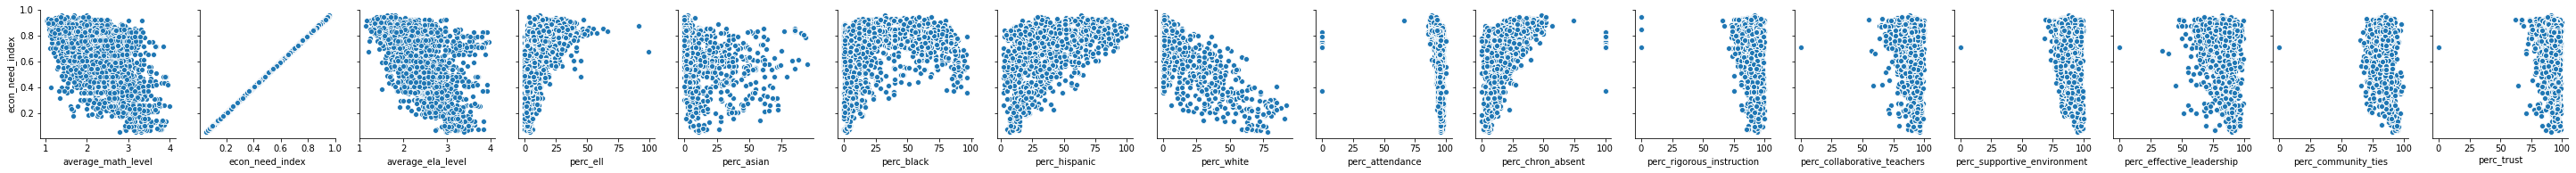

In [73]:
sns.pairplot(data=train_df,
             y_vars=['econ_need_index'
                     #,'average_math_level'average_ela_level
                     ],             
             x_vars=['average_math_level','econ_need_index','average_ela_level','perc_ell', 'perc_asian', 'perc_black','perc_hispanic', 'perc_white', 'perc_attendance', 
                     'perc_chron_absent', 'perc_rigorous_instruction', 'perc_collaborative_teachers', 'perc_supportive_environment', 'perc_effective_leadership', 
                     'perc_community_ties', 'perc_trust']
         )

In [105]:
corrMatrix['average_ela_level']

average_math_level             0.83
econ_need_index               -0.65
average_ela_level              1.00
perc_ell                      -0.34
perc_asian                     0.32
perc_black                    -0.21
perc_hispanic                 -0.39
perc_white                     0.50
perc_attendance               -0.11
perc_chron_absent             -0.36
perc_rigorous_instruction      0.27
perc_collaborative_teachers    0.27
perc_supportive_environment    0.28
perc_effective_leadership      0.27
perc_community_ties            0.23
perc_trust                     0.22
Name: average_ela_level, dtype: float64

Notes from Correlation Charts:


* Math level correlated with: perc_asian, perc_white, perc_chron_absent
* English Level correlated with: 



In [ ]:
# Project 1: Schools with ELLs do far worse at English and Math
# average_match_level ~ perc_ell
# average_Math_level ~ perc_ell + econ_need_index

**# Project 1: Schools with ELLs do far worse at English and Math**

1.   average_match_level ~ perc_ell
2.   average_Math_level ~ perc_ell + econ_need_index

In [27]:
final_model=sm.ols(formula="average_math_level ~ perc_ell", data=train_df)

In [28]:
final_model=final_model.fit()

In [29]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:     average_math_level   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           6.04e-37
Time:                        14:50:40   Log-Likelihood:                -3483.1
No. Observations:                4127   AIC:                             6970.
Df Residuals:                    4125   BIC:                             6983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3179      0.013    172.945      0.0

In [33]:
final_model2=sm.ols(formula="average_math_level ~ perc_ell + econ_need_index", data=train_df)

In [34]:
final_model2=final_model2.fit()
print(final_model2.summary())

                            OLS Regression Results                            
Dep. Variable:     average_math_level   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1447.
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        14:53:24   Log-Likelihood:                -2466.5
No. Observations:                4127   AIC:                             4939.
Df Residuals:                    4124   BIC:                             4958.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3956      0.023    1

In [36]:
pred_val = final_model2.fittedvalues.copy()
true_val = train_df['average_math_level'].values.copy()
residual = true_val - pred_val


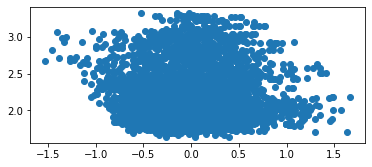

In [39]:
# Residual Plot
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [46]:
# Actual vs Predicted
final_values_model2=pd.DataFrame(pred_val)
final_values_model2.insert(1,"actual_val", true_val)


In [47]:
final_values_model2.head()

,0,actual_val
0,1.716084,1.571429
1,1.716084,2.266667
2,1.716084,1.687500
3,2.218009,2.606061
4,2.218009,2.714286


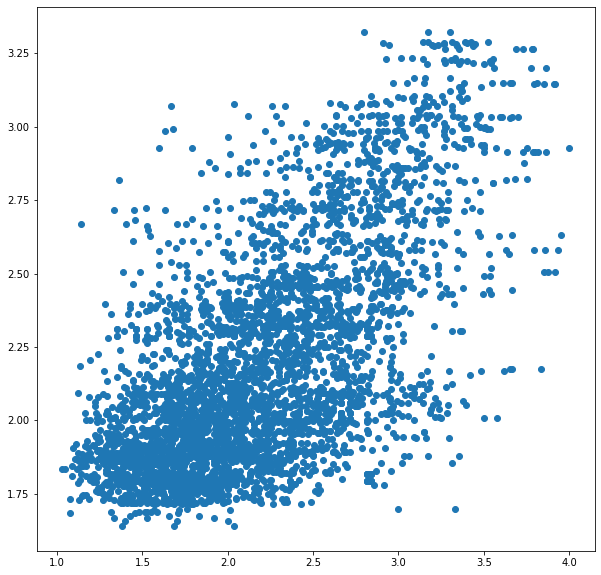

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.scatter(true_val, pred_val)

In [ ]:
# Absenteesim or Wealth - which one has greater impact on performance

In [134]:
#standardize
from sklearn.preprocessing import StandardScaler
temp[['average_math_level','econ_need_index','average_ela_level','perc_ell', 'perc_asian', 'perc_black','perc_hispanic', 'perc_white', 'perc_attendance', 
                     'perc_chron_absent', 'perc_rigorous_instruction', 'perc_collaborative_teachers', 'perc_supportive_environment', 'perc_effective_leadership', 
                     'perc_community_ties', 'perc_trust']] = StandardScaler().fit_transform(train_df[['average_math_level','econ_need_index','average_ela_level','perc_ell', 'perc_asian', 'perc_black','perc_hispanic', 'perc_white', 'perc_attendance', 
                     'perc_chron_absent', 'perc_rigorous_instruction', 'perc_collaborative_teachers', 'perc_supportive_environment', 'perc_effective_leadership', 
                     'perc_community_ties', 'perc_trust']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


IndexError: ignored

In [133]:
temp

array([[-1.074217  ,  1.17580769, -1.08126896, ...,  0.97729156,
         0.30098976,  0.60149771],
       [ 0.1373314 ,  1.17580769, -0.74725704, ...,  0.97729156,
         0.30098976,  0.60149771],
       [-0.8719465 ,  1.17580769, -1.10631985, ...,  0.97729156,
         0.30098976,  0.60149771],
       ...,
       [ 0.85762182,  0.79347908,  1.88475686, ..., -0.48000711,
         0.30098976, -1.101446  ],
       [ 0.91736941,  0.79347908,  0.54243795, ..., -0.48000711,
         0.30098976, -1.101446  ],
       [ 0.3459199 ,  0.79347908,  0.47644116, ..., -0.48000711,
         0.30098976, -1.101446  ]])

In [131]:
train_df_stdzd=pd.DataFrame(temp)

In [132]:
train_df_stdzd.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.074217,1.175808,-1.081269,-0.318674,-0.389071,0.015077,0.714756,-0.611752,0.147832,-0.232544,-0.099745,0.746916,-0.411929,0.977292,0.300990,0.601498
1,0.137331,1.175808,-0.747257,-0.318674,-0.389071,0.015077,0.714756,-0.611752,0.147832,-0.232544,-0.099745,0.746916,-0.411929,0.977292,0.300990,0.601498
2,-0.871947,1.175808,-1.106320,-0.318674,-0.389071,0.015077,0.714756,-0.611752,0.147832,-0.232544,-0.099745,0.746916,-0.411929,0.977292,0.300990,0.601498
3,0.728772,-0.169602,0.552353,-0.691508,-0.101085,-0.401834,0.831504,-0.358161,-0.065007,0.611961,0.936404,1.022031,1.333320,0.873199,0.467973,0.601498
4,0.917369,-0.169602,0.487435,-0.691508,-0.101085,-0.401834,0.831504,-0.358161,-0.065007,0.611961,0.936404,1.022031,1.333320,0.873199,0.467973,0.601498


In [ ]:
final_model3=sm.ols(formula="average_math_level ~ perc_chron_absent + econ_need_index", data=train_df_stdzd)
final_model3=final_model3.fit()
print(final_model3.summary())